In [5]:
import numpy as np
import pandas as pd

In [9]:
df=pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [10]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3059,ham,K..k...from tomorrow onwards started ah?,NaN,NaN,NaN
939,ham,Better. Made up for Friday and stuffed myself ...,NaN,NaN,NaN
673,ham,Ditto. And you won't have to worry about me sa...,NaN,NaN,NaN
3533,ham,Good evening! How are you?,NaN,NaN,NaN
1788,ham,Arun can u transfr me d amt,NaN,NaN,NaN


In [11]:
df.shape

(5572, 5)

In [12]:
#1.Data Cleaning (as many nan are shown)
# 2.EDA(data analysis)
# 3. Text preprocessing
# 4. model building
# 5.evaluation
# 6. Improvements
# 8. deploy

## 1. Data Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
# drop last three columns 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [17]:
df.sample(5)

,v1,v2
4185,ham,"Hmm ok, i'll stay for like an hour cos my eye ..."
3141,ham,Not planned yet :)going to join company on jan...
1910,ham,Becoz its &lt;#&gt; jan whn al the post ofic...
5244,ham,thanks for the temales it was wonderful. Thank...
1252,ham,Yeah like if it goes like it did with my frien...


In [18]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4607,ham,We live in the next &lt;#&gt; mins
5113,ham,U definitely need a module from e humanities d...
2318,ham,On the way to office da..
4105,ham,K then 2marrow are you coming to class.
2485,ham,Lol that's different. I don't go trying to fin...


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [23]:
# giving number to target
df['target']=encoder.fit_transform(df['target'])

In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [27]:
# check for duplicates
df.duplicated().sum()

403

In [28]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [29]:
df.duplicated().sum()

0

In [31]:
df.shape

(5169, 2)

## 2.EDA

In [32]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

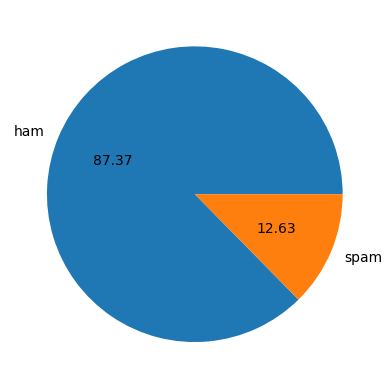

In [36]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show

In [37]:
# data is imbalanced

In [39]:
import nltk

In [49]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# fetch the number of characters
df['num_characters']=df['text'].apply(len)

In [44]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [50]:
# fetch the number of words
import nltk
nltk.download('punkt', download_dir='/usr/local/nltk_data')

[nltk_data] Downloading package punkt to /usr/local/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [51]:
import os
nltk.data.path.append('/usr/local/nltk_data')


In [52]:
import nltk
print(nltk.data.find('tokenizers/punkt'))


C:\Users\abhee\AppData\Roaming\nltk_data\tokenizers\punkt


In [57]:
from nltk.tokenize import  TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
df['num_words']=df['text'].apply(lambda x: tokenizer.tokenize(x))


In [58]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy.., Availab..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [61]:
df['num_sentences']=df['text'].apply(lambda x: len(x.split('.')))


In [62]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy.., Availab...",9
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",7
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",1


In [65]:
print(df.dtypes)

target             int64
text              object
num_characters     int64
num_words         object
num_sentences      int64
dtype: object


In [73]:
df['num_words'] = df['text'].apply(lambda x: len(str(x).split())).astype(int)


In [74]:
df[['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.934030
std,58.236293,11.068488,2.541852
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,4.000000
max,910.000000,171.000000,42.000000


In [ ]:
# ham
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,2.916519
std,56.358207,11.116240,2.638732
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,4.000000
max,910.000000,171.000000,42.000000


In [76]:
# spam 
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.055130
std,30.137753,5.967672,1.725848
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,14.000000


In [77]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

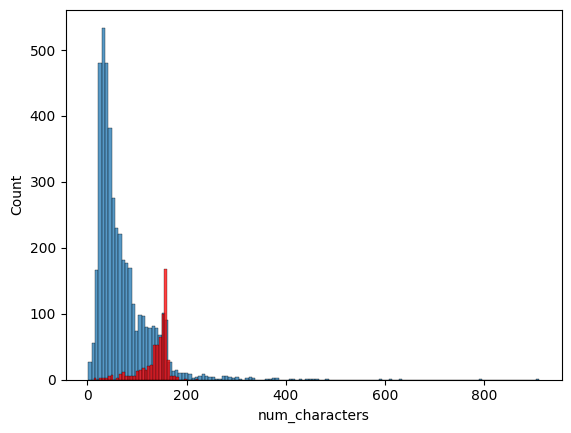

In [81]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

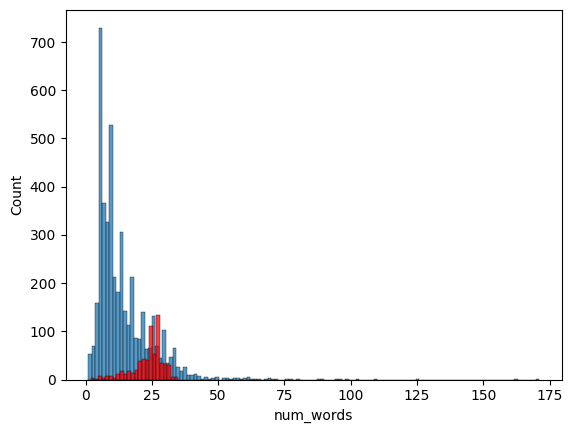

In [82]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

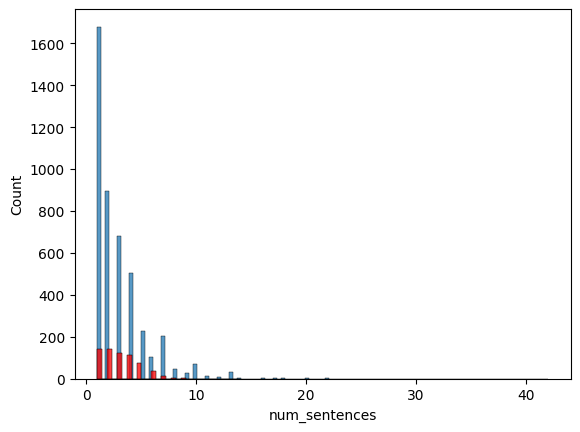

In [83]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'], color='red')

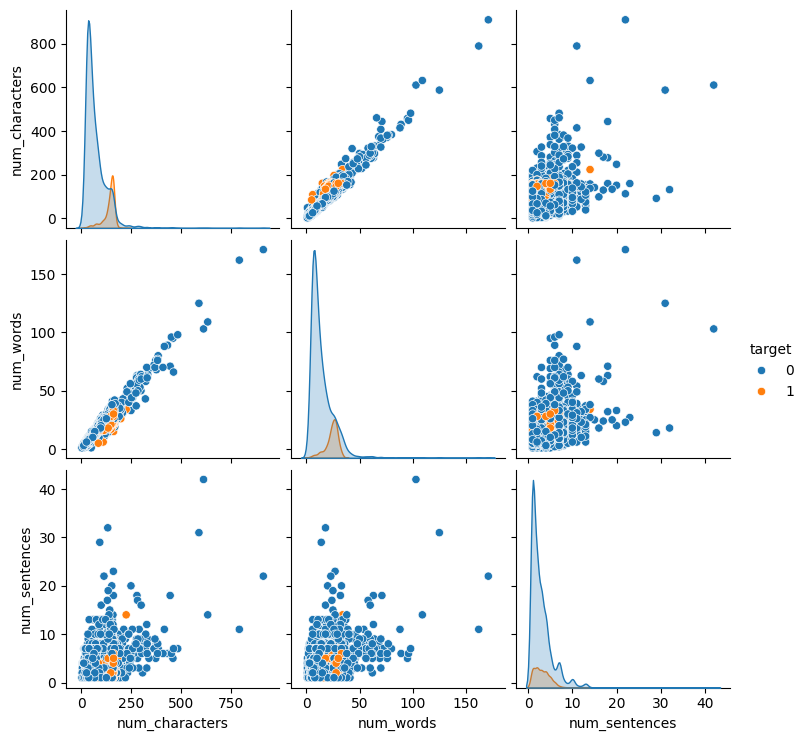

In [84]:
sns.pairplot(df,hue='target')

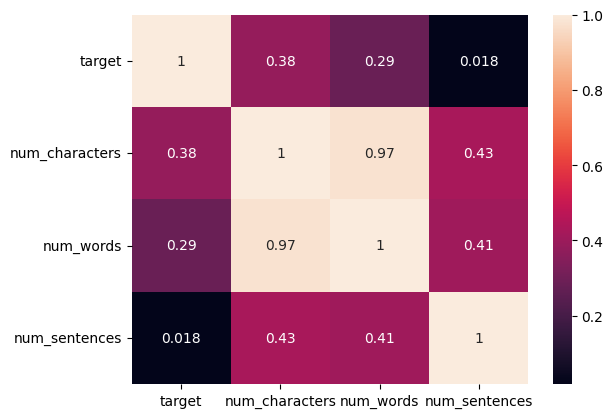

In [90]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check if numeric_df is empty
if numeric_df.shape[1] == 0:
    print("No numeric columns found in the DataFrame.")
else:
    # Generate heatmap
    sns.heatmap(numeric_df.corr(), annot=True)
    plt.show()

## 3.Data Processing
1. Lower case
2. Tokeniztion
3. removing special characters
4. removing stop words and punctuations (unnnecessary words-is of the)
5. stemming(ex - dance dancing danced into dance)

In [149]:
from transformers import AutoTokenizer



tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

ps = PorterStemmer()

def transform_text(text):
    text=text.lower()
    text = tokenizer.tokenize(text)   
    
    filtered_tokens = [token for token in text if token.isalnum()]
    
    text=filtered_tokens[:]
    filtered_tokens.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            filtered_tokens.append(i)

    text=filtered_tokens[:]
    filtered_tokens.clear()
    
    for i in text:
        filtered_tokens.append(ps.stem(i))
    
    return " ".join(filtered_tokens)

In [152]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gonna home soon want talk stuff anymor tonight k cri enough today'

In [154]:
df['transformed_text']=df['text'].apply(transform_text)

In [155]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,go ju point crazi avail bug n great world la e...
1,0,Ok lar... Joking wif u oni...,29,6,7,ok la joke wi u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 w com win fa cup final 21st may 2...
3,0,U dun say so early hor... U c already then say...,49,11,7,u dun say earli ho u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe us live around though


In [162]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [163]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

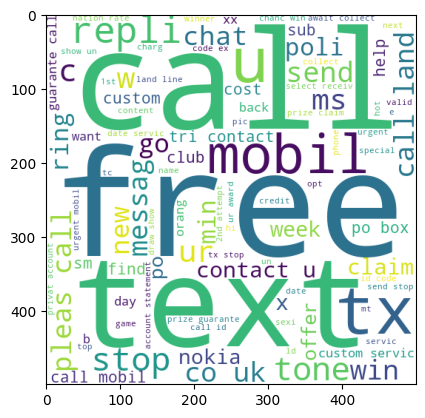

In [164]:
plt.imshow(spam_wc)

In [167]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

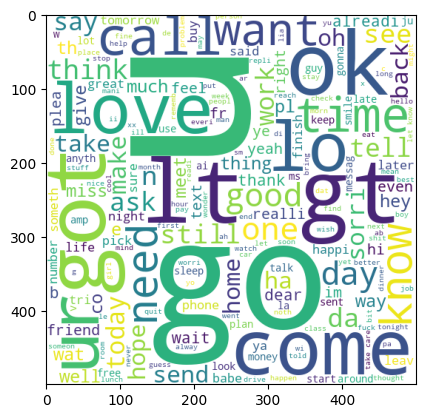

In [168]:
plt.imshow(ham_wc)

In [170]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [171]:
len(spam_corpus)

11346

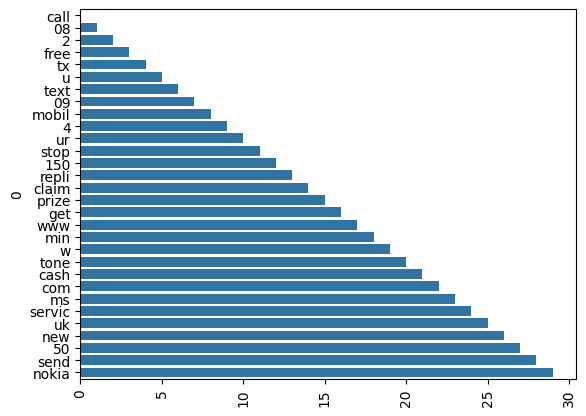

In [176]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

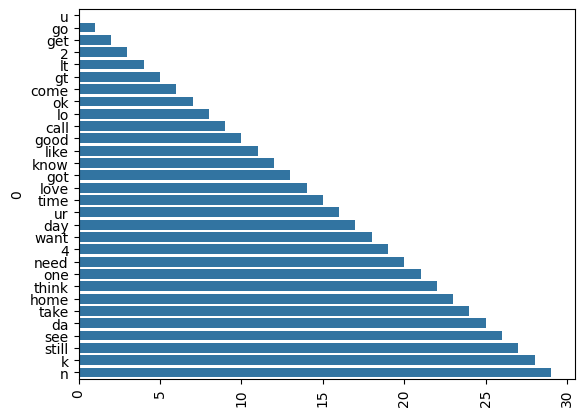

In [177]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [228]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [229]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [230]:
x.shape

(5169, 3000)

In [231]:
y=df['target'].values

In [232]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [233]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [234]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [235]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8462282398452611
[[768 128]
 [ 31 107]]
0.4553191489361702


In [236]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9825918762088974
[[896   0]
 [ 18 120]]
1.0


In [237]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9845261121856866
[[893   3]
 [ 13 125]]
0.9765625


In [240]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))